## Catchment's delineation using PCRaster:

#### The main objective of this script is to delineate catchments using an automatized process with PCRaster and GDAL.  

When the official boundaries are not provided it is possible to delineate it using PCRaster. Usually even when the boundaries are not provided, the area is. Hence it is feasible to perform the comparasion between the area found in the delineated catchment and the official source. 


- The idea is to maybe compute using the GLO30 burned and the SRTM (not burned) and hence compare the two areas to the official. It is most likely that at least one of the computed boundaries will be correct.

Written by: Thiago Victor Medeiros do Nascimento

References:

1. EU-Hydro - River Network Database: https://land.copernicus.eu/imagery-in-situ/eu-hydro/eu-hydro-river-network-database?tab=download
2. Glo 30 (at 90m resolution): https://gee-community-catalog.org/projects/glo30/


First we import some usefull libraries:

In [23]:
from osgeo import gdal, gdalconst
import os
import numpy as np
from pcraster import *
import pcraster as pcraster
import time
import pandas as pd
import tqdm

In [12]:
print(os.getcwd())

C:\Users\nascimth\Downloads\project


#### Flow Direction computation:

First we import the DEM map:

In [13]:
# DEM = readmap(r"C:\Users\nascimth\Downloads\project\dem2.map")         # SRTM DEM (90m)
# DEM = readmap(r"C:\Users\nascimth\Downloads\project\dem_glo90.map")    # GLO30 DEM (90m)

In [10]:
start = time.time()

FlowDirection = lddcreate(DEM, 1e31, 1e31, 1e31, 1e31)

end = time.time()
print("The total processing time was: ", end - start, "seconds")

NameError: name 'DEM' is not defined

Here we can save our map:

In [7]:
report(FlowDirection, "ldd_glo90_3.map")

Now we can proceed wiht the data lecture:

#### 1. Flow directions map:


In [37]:
ldd_glo30 = readmap(r"C:\Users\nascimth\Downloads\project\ldd_glo90_burned_4.map")
ldd_srtm = readmap(r"C:\Users\nascimth\Downloads\project\ldd.map")

#### 2. Catchtment outlets:
It is important to all outlets to be saved in a single .map, with each one receiving a different code that should vary from 1 ownwards:

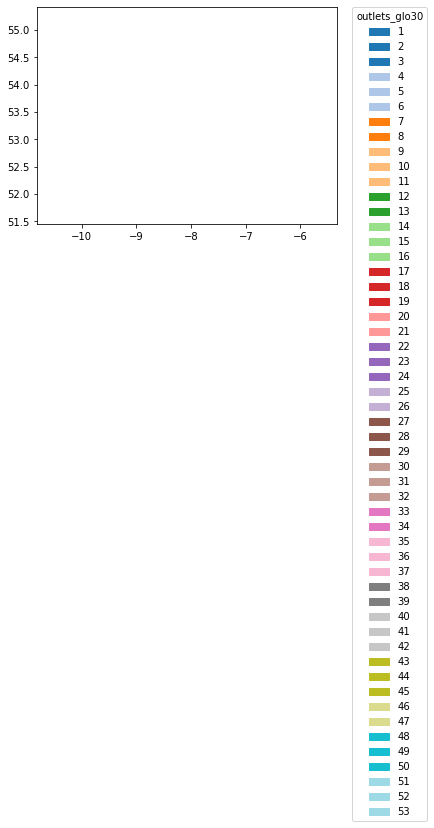

In [16]:
outlets_glo30 = readmap(r"C:\Users\nascimth\Downloads\project\oulets_all2.map")
pcraster.plot(outlets_glo30)

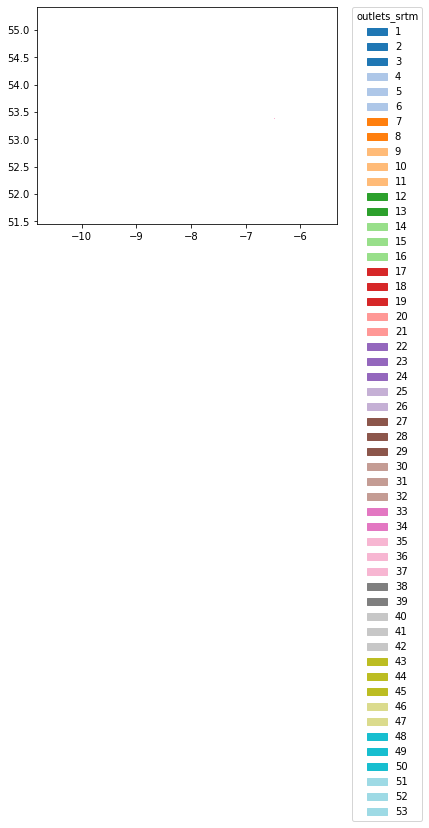

In [17]:
outlets_srtm = readmap(r"C:\Users\nascimth\Downloads\project\oulets_all_srtm.map")
pcraster.plot(outlets_srtm)

#### 4. Catchments delination:

At this part the catchments are delineated and their respective areas are saved to be later compared to the official area provided by the official authority.

In [34]:
areas_summary = pd.DataFrame(index = range(1,54), columns = ["Area_Glo30", "Area_SRTM"])

In [35]:
# Set clone:
setclone(r"C:\Users\nascimth\Downloads\project\ldd_glo90_burned_4.map")

  0%|                                                                                           | 0/53 [00:00<?, ?it/s]

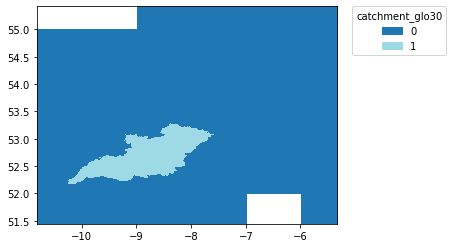

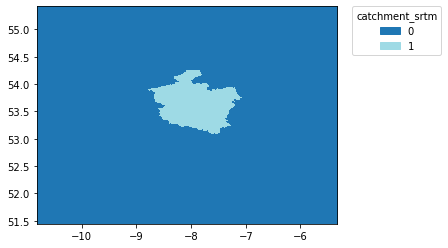

  2%|█▌                                                                                 | 1/53 [00:12<11:10, 12.89s/it]

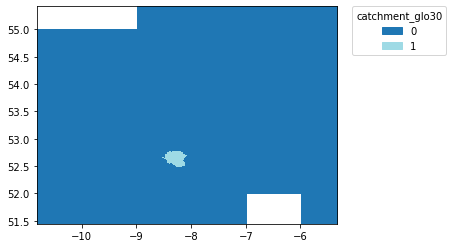

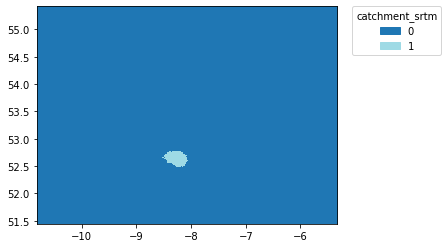

  4%|███▏                                                                               | 2/53 [00:26<11:07, 13.09s/it]

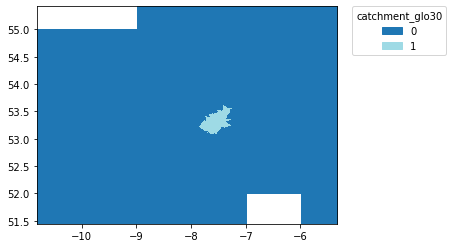

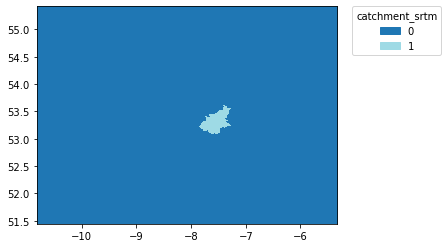

  6%|████▋                                                                              | 3/53 [00:38<10:48, 12.97s/it]

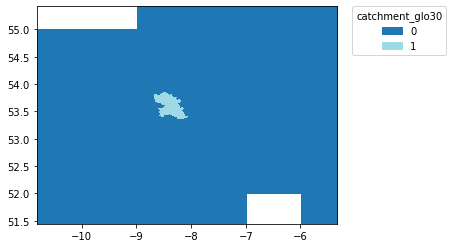

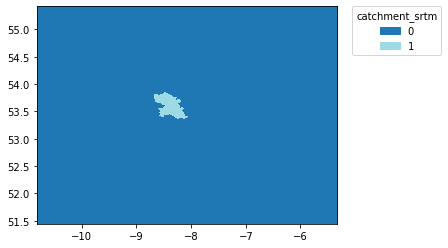

  8%|██████▎                                                                            | 4/53 [00:53<10:56, 13.41s/it]

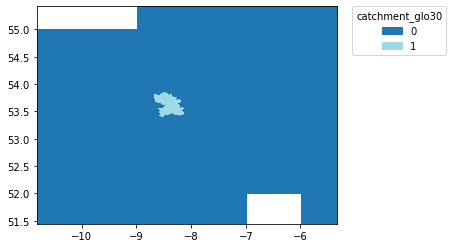

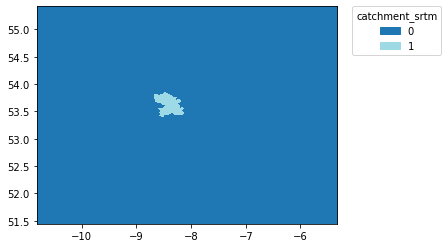

  9%|███████▊                                                                           | 5/53 [01:06<10:50, 13.54s/it]

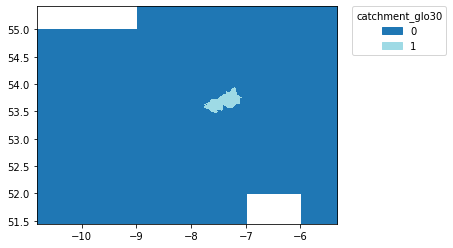

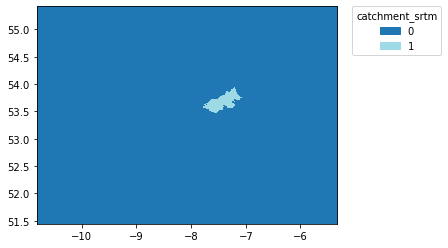

 11%|█████████▍                                                                         | 6/53 [01:19<10:25, 13.31s/it]

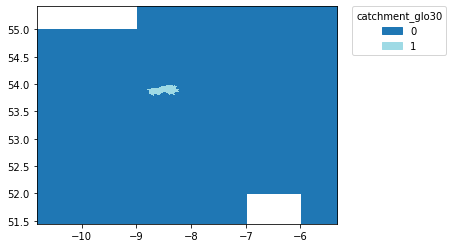

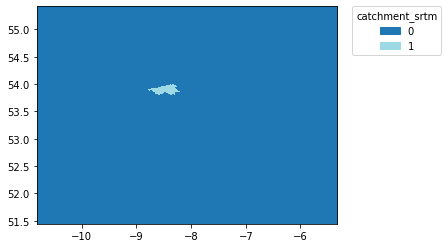

 13%|██████████▉                                                                        | 7/53 [01:32<10:01, 13.07s/it]

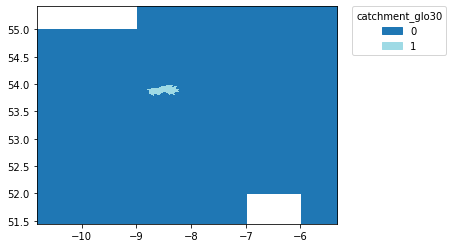

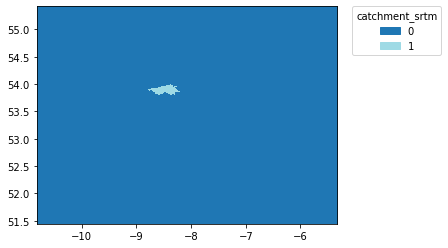

 15%|████████████▌                                                                      | 8/53 [01:45<09:54, 13.20s/it]

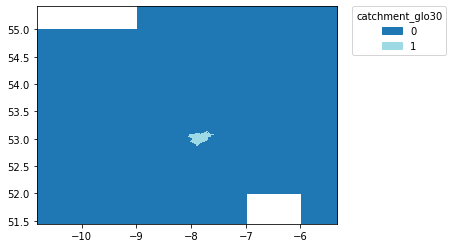

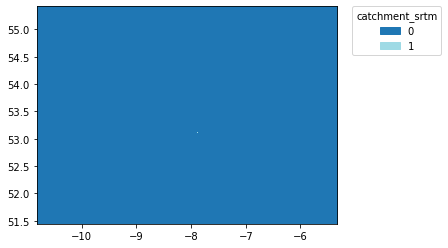

 17%|██████████████                                                                     | 9/53 [01:58<09:28, 12.92s/it]

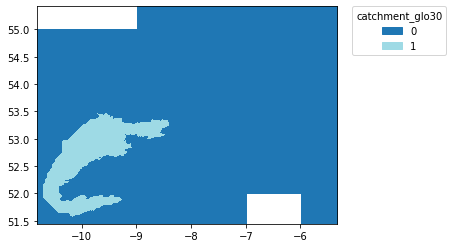

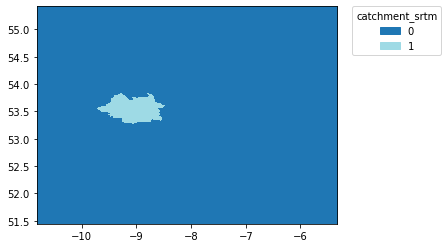

 19%|███████████████▍                                                                  | 10/53 [02:10<09:06, 12.72s/it]

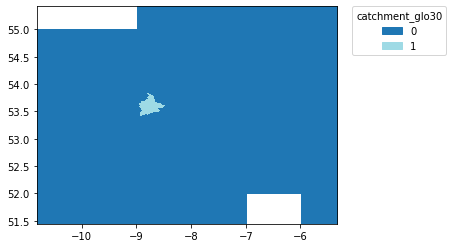

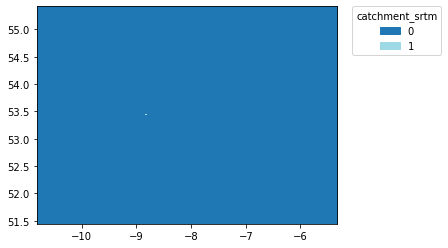

 21%|█████████████████                                                                 | 11/53 [02:22<08:47, 12.56s/it]

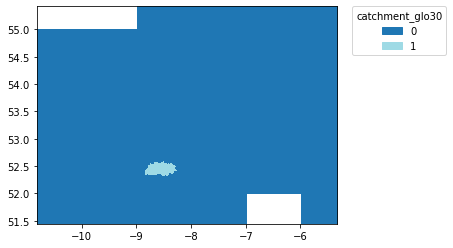

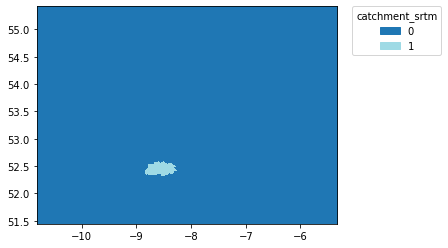

 23%|██████████████████▌                                                               | 12/53 [02:34<08:31, 12.49s/it]

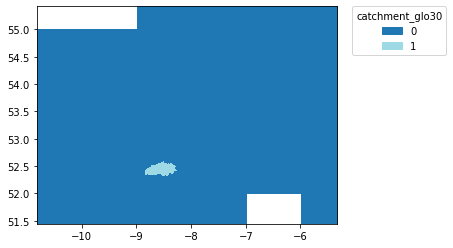

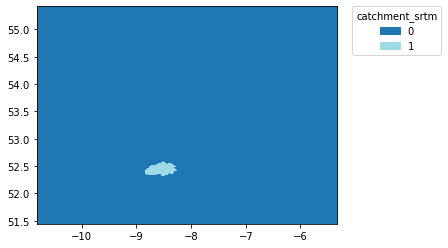

 25%|████████████████████                                                              | 13/53 [02:47<08:20, 12.51s/it]

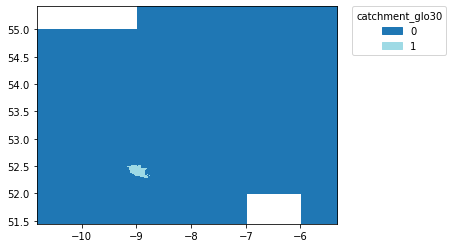

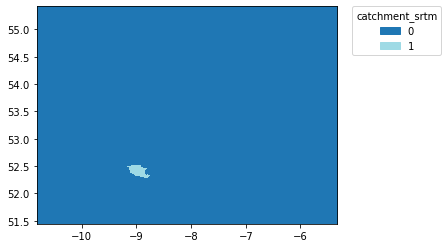

 26%|█████████████████████▋                                                            | 14/53 [02:59<08:07, 12.50s/it]

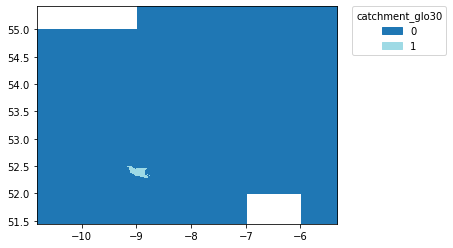

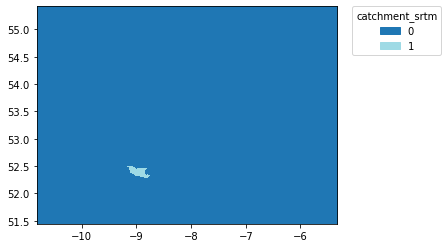

 28%|███████████████████████▏                                                          | 15/53 [03:12<07:52, 12.43s/it]

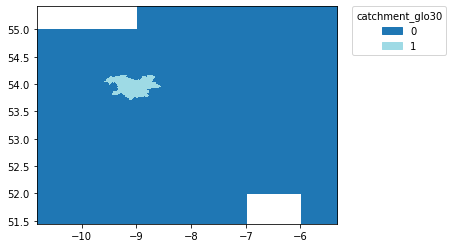

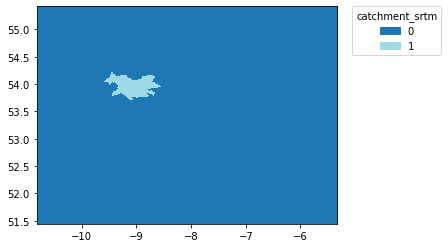

 30%|████████████████████████▊                                                         | 16/53 [03:24<07:40, 12.44s/it]

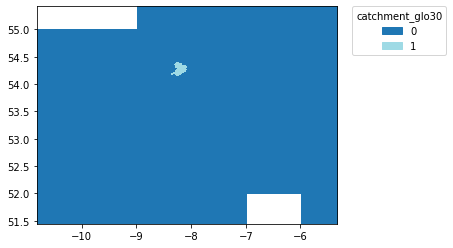

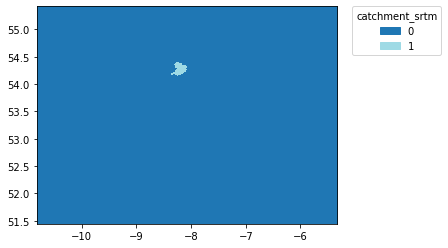

 32%|██████████████████████████▎                                                       | 17/53 [03:37<07:34, 12.63s/it]

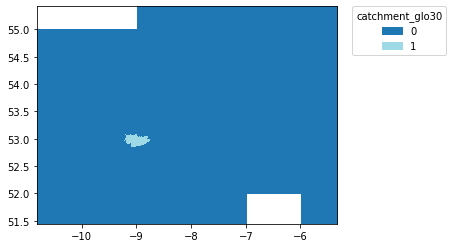

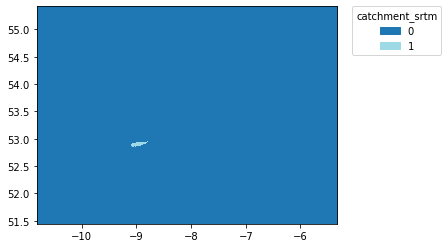

 34%|███████████████████████████▊                                                      | 18/53 [03:50<07:20, 12.58s/it]

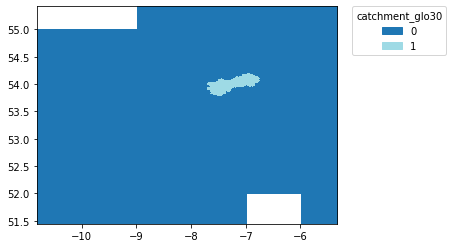

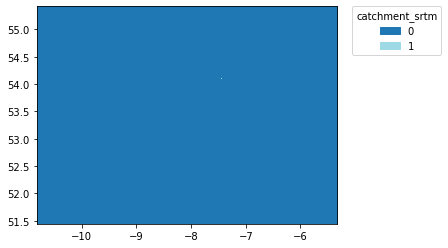

 36%|█████████████████████████████▍                                                    | 19/53 [04:02<07:05, 12.50s/it]

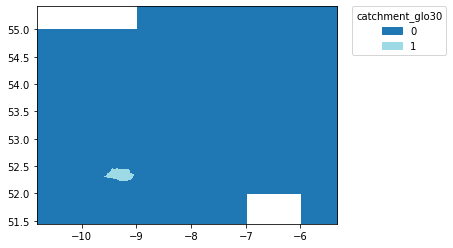

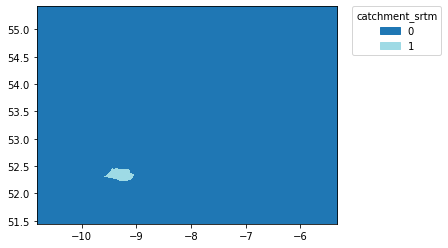

 38%|██████████████████████████████▉                                                   | 20/53 [04:14<06:51, 12.46s/it]

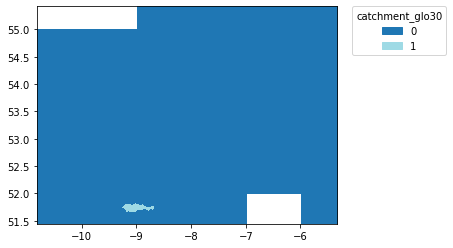

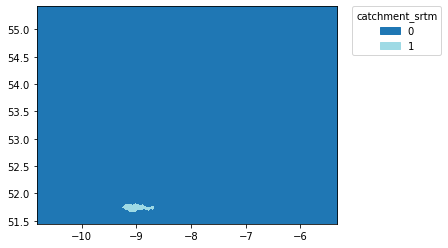

 40%|████████████████████████████████▍                                                 | 21/53 [04:27<06:38, 12.44s/it]

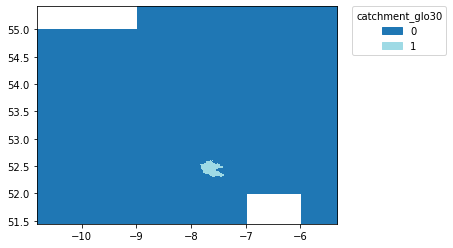

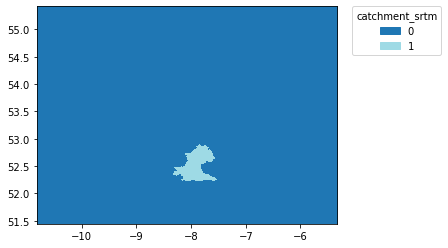

 42%|██████████████████████████████████                                                | 22/53 [04:39<06:25, 12.43s/it]

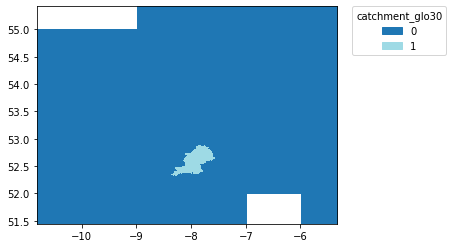

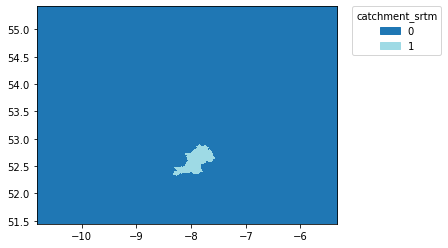

 43%|███████████████████████████████████▌                                              | 23/53 [04:52<06:20, 12.70s/it]

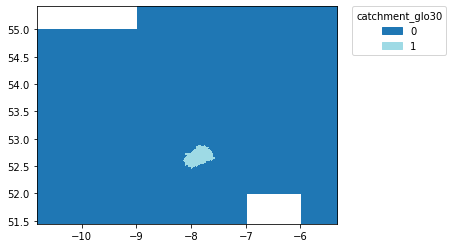

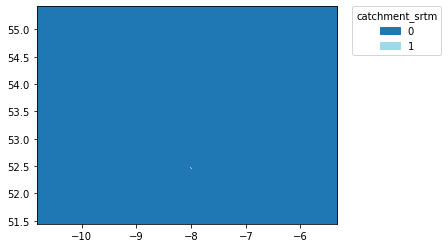

 45%|█████████████████████████████████████▏                                            | 24/53 [05:05<06:11, 12.81s/it]

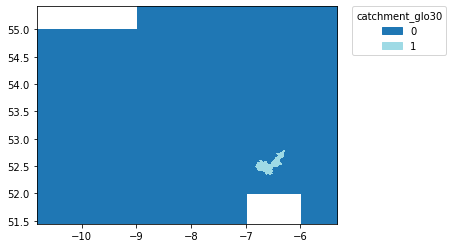

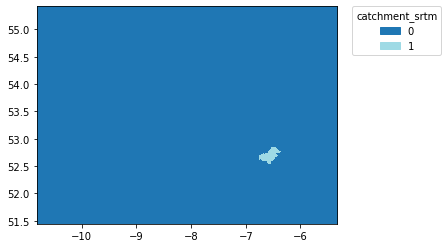

 47%|██████████████████████████████████████▋                                           | 25/53 [05:18<06:00, 12.86s/it]

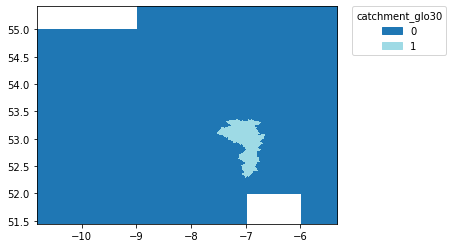

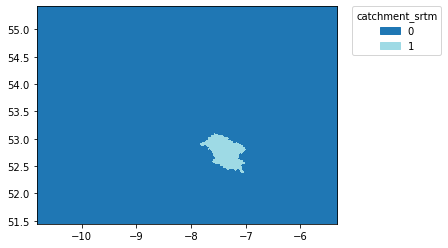

 49%|████████████████████████████████████████▏                                         | 26/53 [05:32<05:48, 12.92s/it]

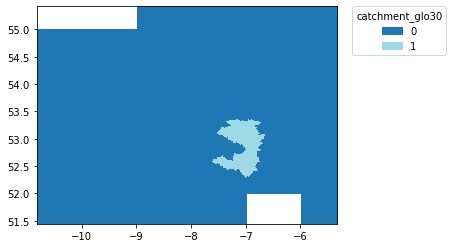

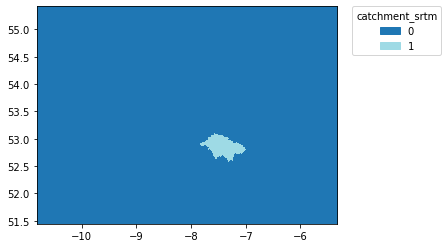

 51%|█████████████████████████████████████████▊                                        | 27/53 [05:44<05:34, 12.85s/it]

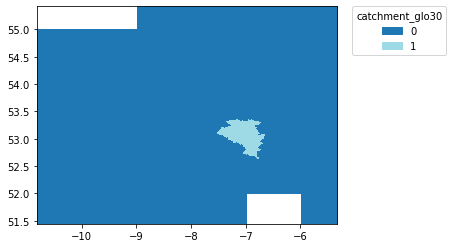

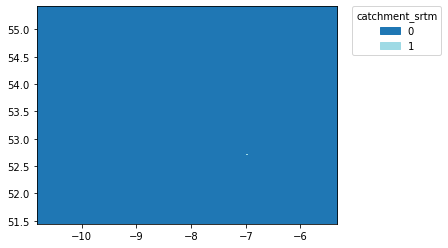

 53%|███████████████████████████████████████████▎                                      | 28/53 [05:57<05:21, 12.88s/it]

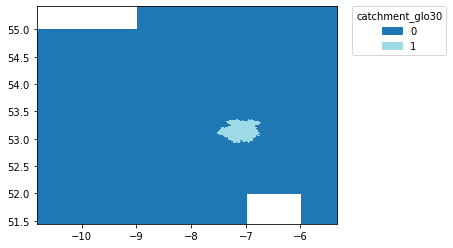

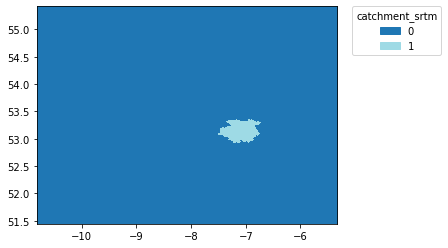

 55%|████████████████████████████████████████████▊                                     | 29/53 [06:10<05:06, 12.78s/it]

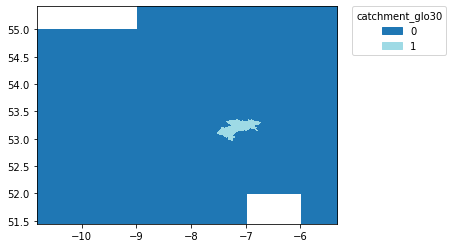

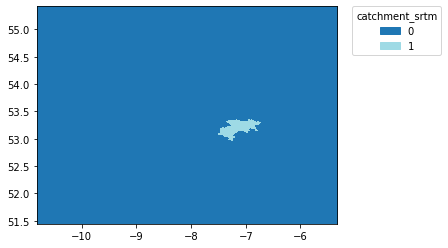

 57%|██████████████████████████████████████████████▍                                   | 30/53 [06:23<04:57, 12.96s/it]

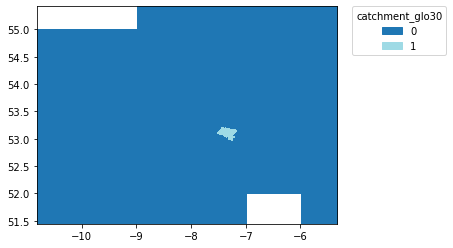

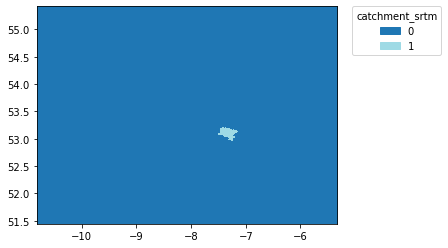

 58%|███████████████████████████████████████████████▉                                  | 31/53 [06:35<04:41, 12.79s/it]

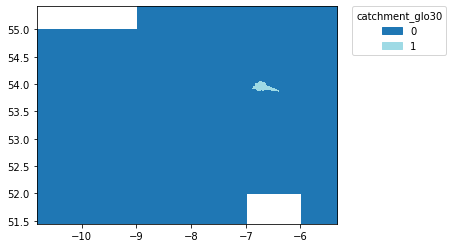

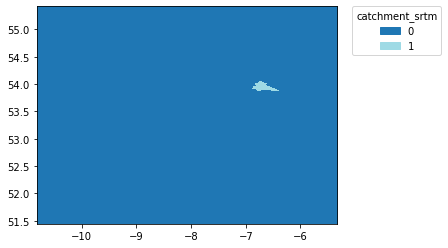

 60%|█████████████████████████████████████████████████▌                                | 32/53 [06:48<04:27, 12.74s/it]

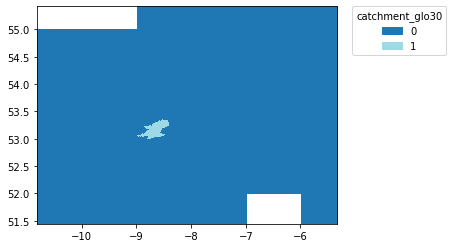

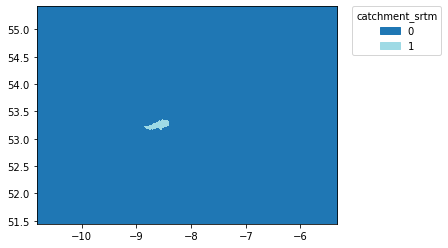

 62%|███████████████████████████████████████████████████                               | 33/53 [07:01<04:14, 12.71s/it]

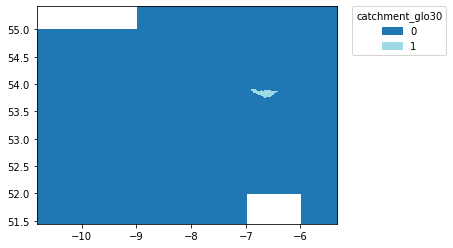

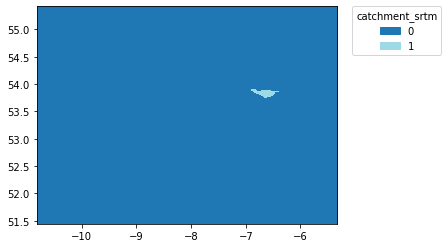

 64%|████████████████████████████████████████████████████▌                             | 34/53 [07:13<03:58, 12.56s/it]

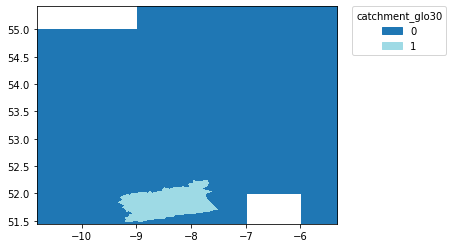

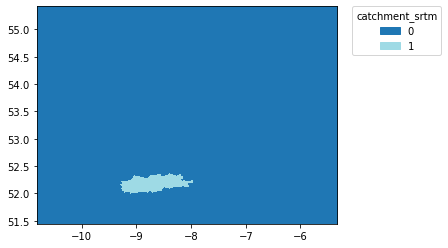

 66%|██████████████████████████████████████████████████████▏                           | 35/53 [07:26<03:46, 12.56s/it]

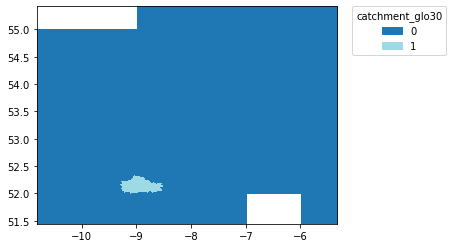

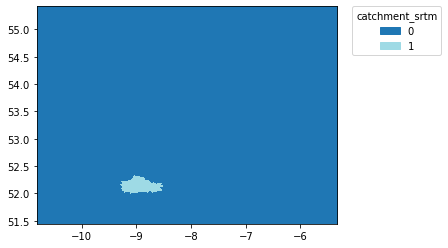

 68%|███████████████████████████████████████████████████████▋                          | 36/53 [07:37<03:30, 12.37s/it]

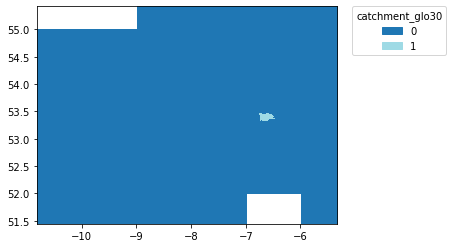

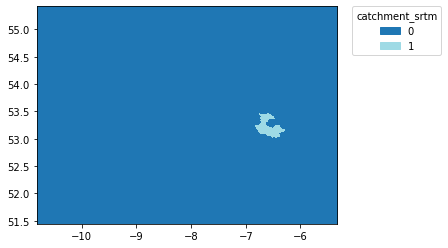

 70%|█████████████████████████████████████████████████████████▏                        | 37/53 [07:50<03:17, 12.34s/it]

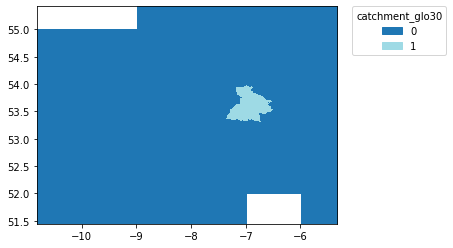

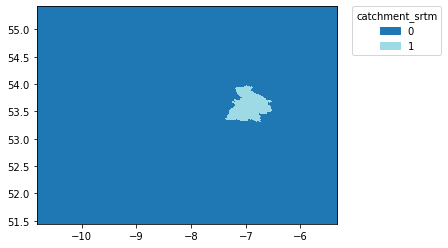

 72%|██████████████████████████████████████████████████████████▊                       | 38/53 [08:02<03:03, 12.26s/it]

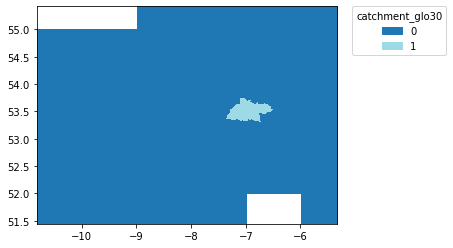

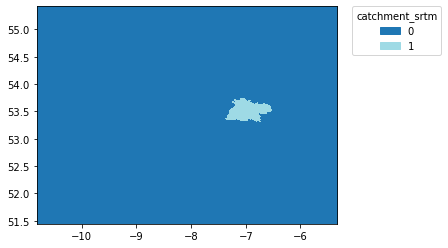

 74%|████████████████████████████████████████████████████████████▎                     | 39/53 [08:14<02:50, 12.19s/it]

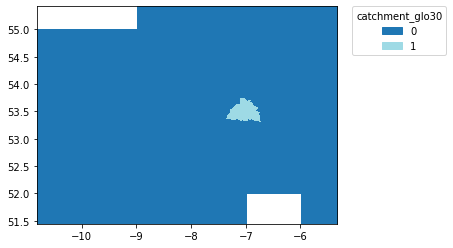

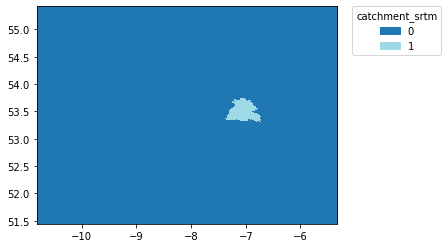

 75%|█████████████████████████████████████████████████████████████▉                    | 40/53 [08:26<02:37, 12.13s/it]

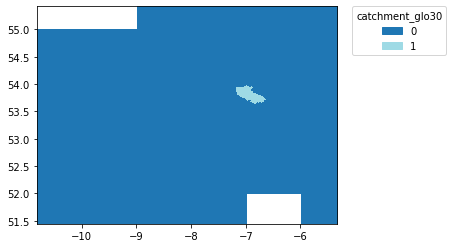

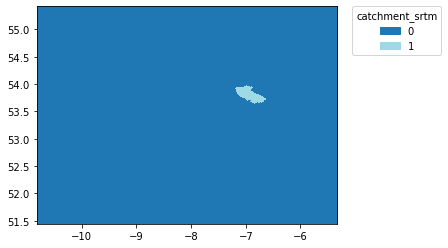

 77%|███████████████████████████████████████████████████████████████▍                  | 41/53 [08:38<02:25, 12.12s/it]

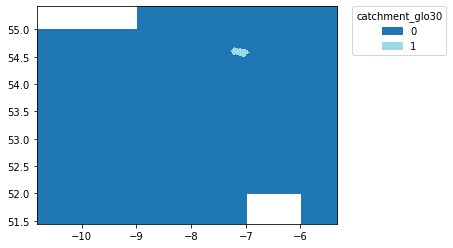

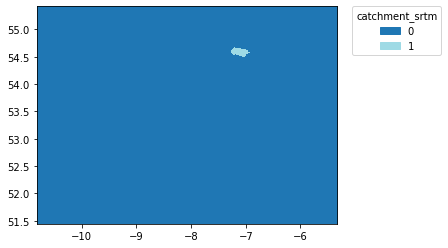

 79%|████████████████████████████████████████████████████████████████▉                 | 42/53 [08:50<02:13, 12.17s/it]

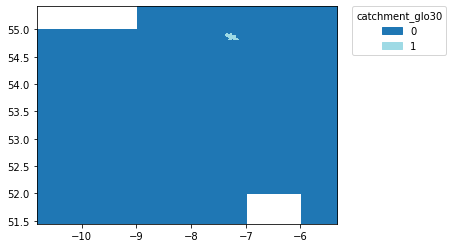

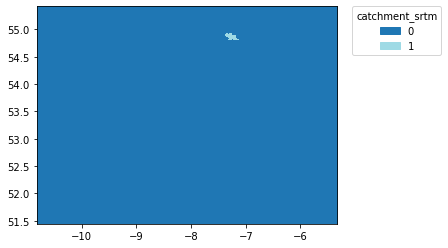

 81%|██████████████████████████████████████████████████████████████████▌               | 43/53 [09:03<02:02, 12.26s/it]

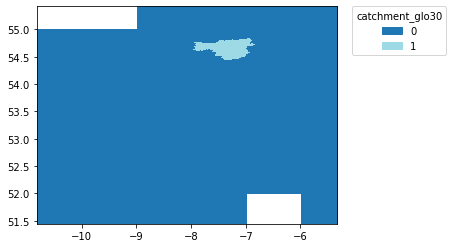

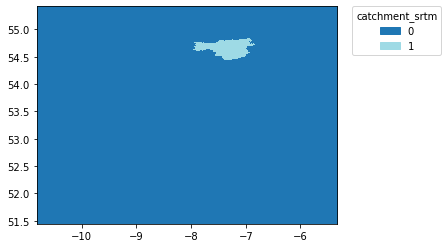

 83%|████████████████████████████████████████████████████████████████████              | 44/53 [09:15<01:51, 12.35s/it]

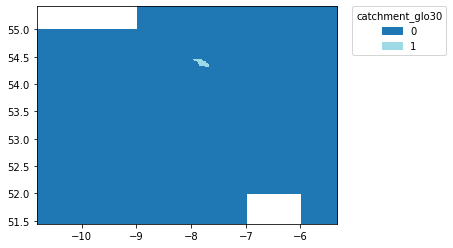

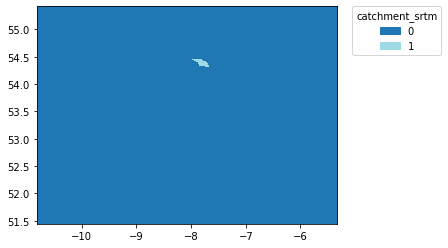

 85%|█████████████████████████████████████████████████████████████████████▌            | 45/53 [09:27<01:37, 12.24s/it]

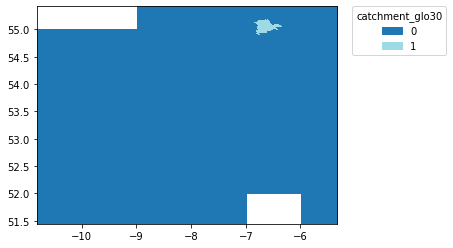

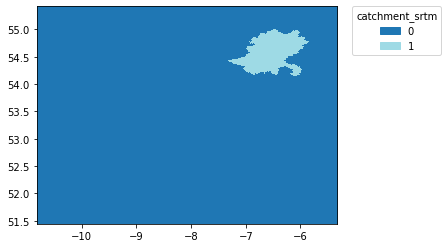

 87%|███████████████████████████████████████████████████████████████████████▏          | 46/53 [09:39<01:25, 12.19s/it]

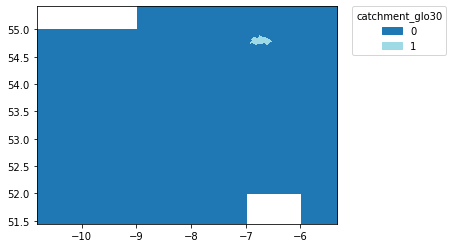

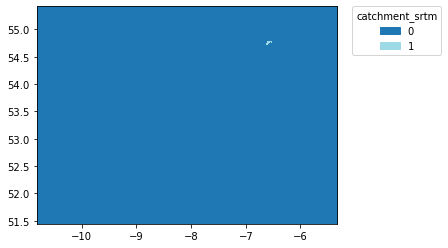

 89%|████████████████████████████████████████████████████████████████████████▋         | 47/53 [09:51<01:12, 12.16s/it]

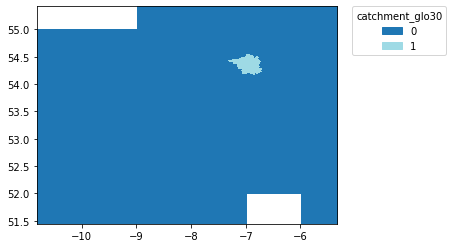

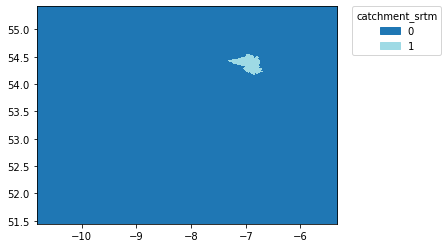

 91%|██████████████████████████████████████████████████████████████████████████▎       | 48/53 [10:03<01:00, 12.10s/it]

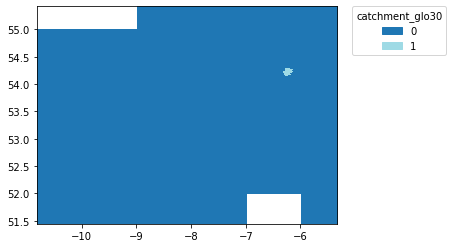

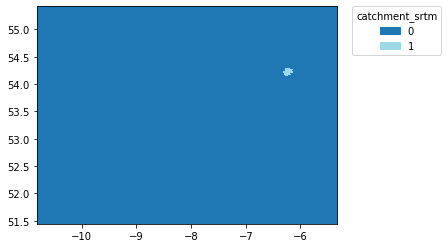

 92%|███████████████████████████████████████████████████████████████████████████▊      | 49/53 [10:15<00:48, 12.06s/it]

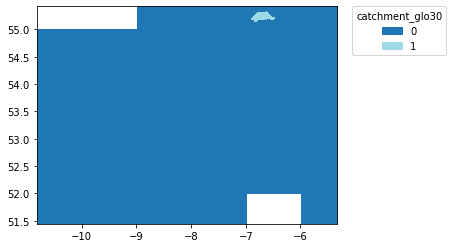

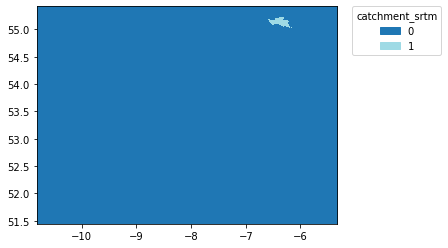

 94%|█████████████████████████████████████████████████████████████████████████████▎    | 50/53 [10:28<00:36, 12.14s/it]

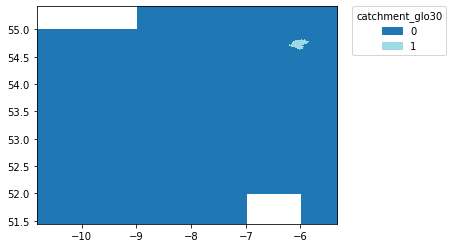

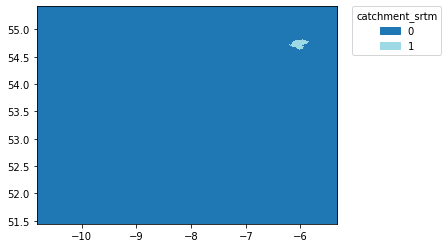

 96%|██████████████████████████████████████████████████████████████████████████████▉   | 51/53 [10:40<00:24, 12.13s/it]

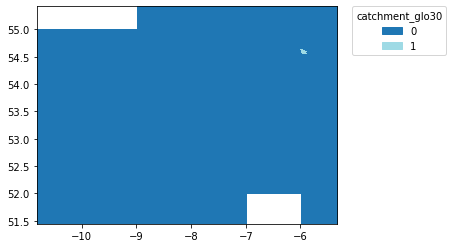

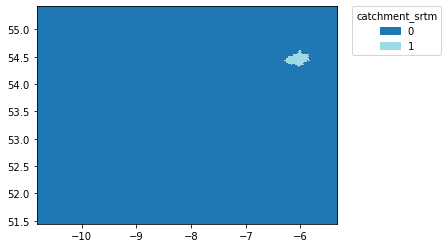

 98%|████████████████████████████████████████████████████████████████████████████████▍ | 52/53 [10:53<00:12, 12.42s/it]

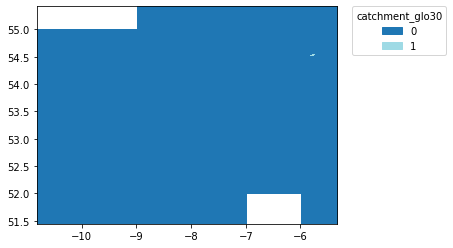

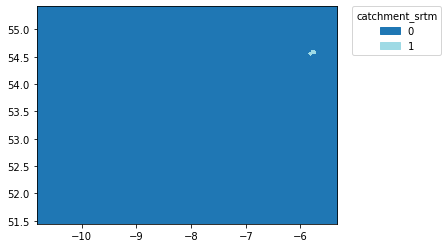

100%|██████████████████████████████████████████████████████████████████████████████████| 53/53 [11:05<00:00, 12.56s/it]


In [61]:
# Basins delineation and areas computation:
i = 0
for outlet in tqdm.tqdm(range(1, 54)):
    
    # Here we create a nominal with the code of the outlet (e.g., 1, 2,...):
    # Glo30:
    clone_glo30 = nominal(outlet)
    outlet_glo30 = nominal(clone_glo30 == outlets_glo30)
    
    # SRTM:
    clone_srtm = nominal(outlet)
    outlet_srtm = nominal(clone_srtm == outlets_srtm)
    
    # Compute the catchment
    # Glo30:
    catchment_glo30 = catchment(ldd_glo30, outlet_glo30)
    
    # SRTM:
    catchment_srtm = catchment(ldd_srtm, outlet_srtm)   
        
    # Here we compute the total number of grids per class:
    # Glo30:
    Result_glo30 = areatotal(scalar(catchment_glo30), catchment_glo30)
    
    # SRTM:
    Result_srtm = areatotal(scalar(catchment_srtm), catchment_srtm)
    
    # Now we can convert it to numpy:
    # Glo30:
    result_2_glo30 = pcr2numpy(Result_glo30, 1)
    
    # SRTM:
    result_2_srtm = pcr2numpy(Result_srtm, 1)
    
    # Get the unique values:
    # Glo30:
    unique_glo30, counts_glo30 = np.unique(result_2_glo30, return_counts=True)
    
    # SRTM:
    unique_srtm, counts_srtm = np.unique(result_2_srtm, return_counts=True)
    
    # Approximation to the area:
    # Since the LDD is in WGS 84 and not projected, an acceptble aproxiation is to multiply the number of grid cells by the
    # approximate area of one grid cell:
    # Glo30:
    Areaclass_glo30 = (counts_glo30[-1] * 68.38932909679238037 * 68.38932909679238037)/1000000
    
    # SRTM:
    Areaclass_srtm = (counts_srtm[-1] * 68.38932909679238037 * 68.38932909679238037)/1000000
    
    areas_summary.iloc[i, 0] = Areaclass_glo30
    areas_summary.iloc[i, 1] = Areaclass_srtm
    
    # Here we export the areas:
    name_glo30 = "catchment_" + str(outlet) + "glo30.map"
    name_srtm = "catchment_" + str(outlet) + "srtm.map"
    
    # Here we can export our catchment maps:
    #report(catchment_glo30, name_glo30)
    #report(catchment_srtm, name_srtm)
    
    pcraster.plot(catchment_glo30)
    pcraster.plot(catchment_srtm)
    
    i = i + 1

In [65]:
network = pd.read_excel(r'gauges_irelandisland.xlsx', skiprows=0)
network.head()

,Code,grdc_no,wmo_reg,sub_reg,river,station,country,lat,long,area,...,r_height_y,id,poly_id,point_id,n,distance,feature_x,feature_y,nearest_x,nearest_y
0,9296,6502101,6,6021,RIVER SHANNON,BANAGHER,IE,53.193787,-7.993647,7989.0,...,n.a.,403340,167536,0,1,0.000572,-7.993647,53.193787,-7.993075,53.193778
1,9297,6502110,6,6021,MULKEAR RIVER,ANNACOTTY,IE,52.669276,-8.529147,646.0,...,776.19566563467401,502251,206462,1,1,0.000880,-8.529147,52.669276,-8.528292,52.669071
2,9299,6502141,6,6021,RIVER BROSNA,FERBANE,IE,53.269937,-7.828063,1207.0,...,469.74792377796098,387087,160528,0,1,0.000651,-7.828063,53.269937,-7.828144,53.270584
3,9300,6502150,6,6021,RIVER SUCK,BELLAGILL,IE,53.361687,-8.238554,1184.0,...,714.38095945945895,364903,151344,3,1,0.000569,-8.238554,53.361687,-8.238046,53.361943
4,9301,6502151,6,6021,RIVER SUCK,DERRYCAHILL,IE,53.431764,-8.262762,1050.0,...,649.70166857142794,348578,144697,1,1,0.000453,-8.262762,53.431764,-8.263109,53.431472


In [70]:
areas_summary["Area_Official"] = network.area.values
areas_summary["Diff_Glo30"] = 100 * (areas_summary.Area_Glo30 - areas_summary.Area_Official)/areas_summary.Area_Official
areas_summary["Diff_SRTM"] = 100 * (areas_summary.Area_SRTM - areas_summary.Area_Official)/areas_summary.Area_Official

areas_summary

,Area_Glo30,Area_SRTM,Area_Official,Diff_Glo30,Diff_SRTM
1,9247.408437,7971.570299,7989.0,15.751764,-0.218171
2,616.423116,666.266974,646.0,-4.578465,3.137302
3,1160.71599,1148.24684,1207.0,-3.834632,-4.867702
4,1212.079906,1195.672638,1184.0,2.371614,0.985865
5,1090.868174,1078.50192,1050.0,3.892207,2.714469
6,1083.53448,1022.343977,1071.0,1.170353,-4.543046
7,507.755366,470.193574,533.0,-4.736329,-11.78357
8,500.688268,456.148241,520.0,-3.713795,-12.279184
9,455.52151,2.600468,493.0,-7.602128,-99.472522
10,11171.586223,3063.608292,3111.0,259.099525,-1.523359


We can now select the delineation with the area closest to the official area available. We can use a threshould of 10%, and if none of the delineations are below this threshould we should check it manually.